In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc



In [12]:
N = 100
tmax = 10
D = 1
def potential(x):
    return x ** 4 / 4 - x ** 2 / 2

def dpotential(x):
    return x ** 3 - x

def action(init_values, q0, qf):
        """function to calculate the stochastic action using the Ito formalism

        Args:
            dt (float): time step width
            q (np.ndarray): position
            k1 (np.ndarray): conjugate variable to q

        Returns:
            float: (discrete) MSR action of system
        """
        q = init_values[:N]
        #k1 = init_values[N:]
        
        q[0] = q0
        q[-1] = qf
        
        dt = tmax / N

        # dimension
        m = len(q) - 1

        # derivatives
        qdot = np.zeros(m)

        qdot[:] = (q[1:] - q[:-1]) / dt

        # action
        S = 0
        
        for i in range(m):
            S += (qdot[i] + dpotential(q[i])) ** 2 / 2
        # (
        #     D**(-1) * np.dot(qdot + misc.derivative(potential, q[:-1]), qdot + misc.derivative(potential, q[:-1]))
        #     #- lambda_ * np.dot(np.ones(m), phi(k1[:-1] * a))
        # )

        # return the action
        return S * dt

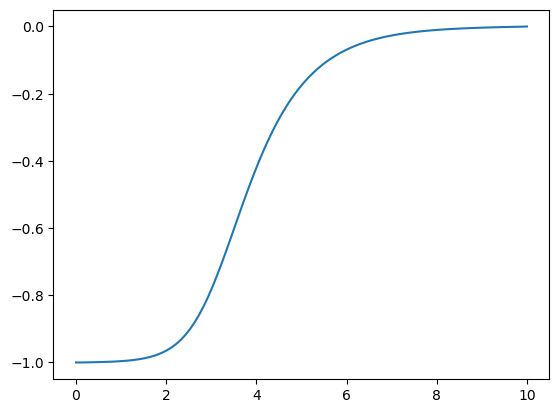

In [16]:

q0 = -1
qf = 0
system = np.linspace(q0, qf, N)
optimum = opt.minimize(action, x0=system, args=(q0, qf))#, constraints=constraint, options={'disp': True})


time = np.linspace(0, tmax, N)
q = np.zeros(N)
q[0] = -1
q[-1] = 0
q[1:-1] = optimum.x[:N-2]


plt.plot(time, q)